<a href="https://colab.research.google.com/github/thopiyawan/topic-modeling-thai/blob/main/new_experiment_ldamodel9cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [644]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [645]:
!pwd

/content/drive/.shortcut-targets-by-id/1UHDKxOFjfONnMYU-auICT39cUoR5NF0D/SWU-Master-Thesis-63/Ploy/topicmodeling_thai


In [646]:
cd /content/drive/My Drive/SWU-Master-Thesis-63/Ploy/topicmodeling_thai

/content/drive/.shortcut-targets-by-id/1UHDKxOFjfONnMYU-auICT39cUoR5NF0D/SWU-Master-Thesis-63/Ploy/topicmodeling_thai


In [647]:
!pip install -r requirements.txt

  Using cached https://files.pythonhosted.org/packages/dc/16/7724205e25a8fdd2bc5ccb79c9240947f5cba9dc07e58c30e6df85fd82c0/astropy-4.2-cp37-cp37m-manylinux1_x86_64.whl
Reason for being yanked: re-release with new wheels
  Using cached https://files.pythonhosted.org/packages/8f/ba/1d22e9d2f332f07aaa57041f5dd569c2cb40a92bd6374a0b743ec3dfae97/atari_py-0.2.6-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/c3/aa/cb45262569fcc047bf070b5de61813724d6726db83259222cd7b4c79821a/attrs-20.3.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/dd/a5/81076e10b5ef74493cf08a8e419e61b64324c9c55db4aa7f89c0240c4873/Babel-2.9.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/05/49/76c0bed3272ba8f812eb41e95514083122a0358d13848be8198a6b394530/bokeh-2.3.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/bb/72/8df2e0dc991f1a1d2c6869404e7622e8ee50d80bff357dbb57c3df70305b/cachetools-4.2.1-py3-none-any.whl
  U

In [648]:
import time
start_time = time.time()

In [649]:
import requests
from bs4 import BeautifulSoup
from time import  time, sleep
from random import randint

# from googletrans import Translator

from tqdm import tqdm
from tqdm import tqdm_notebook
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from nltk import sent_tokenize, word_tokenize
from nltk.sentiment.vader import  SentimentIntensityAnalyzer
from nltk.sentiment.util import mark_negation

In [650]:
dataset = pd.read_csv("dataset/QA_pregnancy.csv",encoding='utf8')
print(dataset.shape)
dataset.head()


(9987, 5)


,question,href,date_ask,user,answer
0,ตั้งครรภ์,https://hd.co.th//ask/27734160,"October 01, 2019 17:30",\nHonestDocs User 1082087\n,เราได้รับคำถามของคุณแล้ว รอทีมแพทย์มาตอบคำถามส...
1,ตั้งครรภ์5เดือนสามารถตัดปากมดได้ไหม,https://hd.co.th//ask/51006398,"June 30, 2018 14:49",\nHonestDocs User 912491\n,NaN
2,ตั้งครรภ์14สัปดาค่ะปวดท้องเหนือสะดือเเนวยาวร่อ...,https://hd.co.th//ask/4362714,"August 31, 2018 15:07",\nHonestDocs User 929536\n,NaN
3,ตั้งครรภ์24สัปดาห์โดนหมากัดที่ขามีรอยถลอกต้องไ...,https://hd.co.th//ask/33971594,"November 07, 2018 18:58",\nHonestDocs User 954767\n,วัคซีนพิษสุนัทบ้าและอิมมูโนโกลบูลินสามารถให้ใน...
4,ตั้งครรภ์ แต่ได๋อัลตราซาวด์ดูหมอบอกมีเลือกออกบ...,https://hd.co.th//ask/48478898,"August 06, 2018 1:35",\nHonestDocs User 921834\n,รบกวนขอข้อมูลเพพิ่มเติมด้วยครับ คุณแม่อายุเท่า...


In [651]:
dataset.describe()

,question,href,date_ask,user,answer
count,9987,9987,9982,9986,9529
unique,9891,9987,9901,8251,8995
top,สวัสดีครับ ผมได้มีเพศสัมพันธ์กับเเฟนเมื่อวันที...,https://hd.co.th//ask/19014359,"May 13, 2018 22:29",\nHonestDocs User \n,สวัสดีค่ะ คำถามของคุณอาจกว้างเกินไป ทำให้คุณหม...
freq,3,1,3,616,195


In [652]:
print(dataset.shape)
print("===============================================")
print(dataset.info())

(9987, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9987 entries, 0 to 9986
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  9987 non-null   object
 1   href      9987 non-null   object
 2   date_ask  9982 non-null   object
 3   user      9986 non-null   object
 4   answer    9529 non-null   object
dtypes: object(5)
memory usage: 390.2+ KB
None


In [653]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [654]:
try:
    %tensorflow_version 2.x
except:
    pass

In [655]:
#dev version
# !pip install https://github.com/PyThaiNLP/pythainlp/archive/dev.zip
# release version 
! pip install pythainlp
!pip install epitran
!pip install sklearn_crfsuite
!pip install tensorflow deepcut
!pip install attacut

In [656]:
import warnings
warnings.filterwarnings('ignore')

In [657]:
import pythainlp

pythainlp.__version__

'2.3.1'

In [658]:
import re, string, unicodedata

In [659]:
from pythainlp import sent_tokenize, word_tokenize
from pythainlp.corpus import thai_stopwords
from pythainlp.util import normalize
from pythainlp.spell import correct

stopwords = list(thai_stopwords())


In [660]:
dataset = dataset[['question','user']]
dataset['index'] = dataset.index
dataset 

,question,user,index
0,ตั้งครรภ์,\nHonestDocs User 1082087\n,0
1,ตั้งครรภ์5เดือนสามารถตัดปากมดได้ไหม,\nHonestDocs User 912491\n,1
2,ตั้งครรภ์14สัปดาค่ะปวดท้องเหนือสะดือเเนวยาวร่อ...,\nHonestDocs User 929536\n,2
3,ตั้งครรภ์24สัปดาห์โดนหมากัดที่ขามีรอยถลอกต้องไ...,\nHonestDocs User 954767\n,3
4,ตั้งครรภ์ แต่ได๋อัลตราซาวด์ดูหมอบอกมีเลือกออกบ...,\nHonestDocs User 921834\n,4
...,...,...,...
9982,คุณหมอคะ หลังจากที่เรามีเพศสัมพันธ์ กี่วันคะ จ...,\nHonestDocs User 904412\n,9982
9983,ประจำเดือนขาดมาครั้งสุดท้ายเมื่อต้นเมษายนค่ะ แ...,\nHonestDocs User 904485\n,9983
9984,รับทำแท้งมั้ยค่ะ,\nHonestDocs User 907823\n,9984
9985,เดือนพคประจำเดือนมาช่วงต้นเดือนและกลางเดือน2รอ...,\nHonestDocs User 906992\n,9985


In [661]:
dataset['question'].tail(20)

9967    คือหนูอายุ14ปีค่ะ แล้วประจำเดือนมา20 กว่าวันแล...
9968    สวัสดีค่ะ คือประจำหนูขาดมา36วันแล้วนับจากประจำ...
9969    มีเพศสัมพันธ์วันที่5พคหลั่งนอกทานยาคุมฉุกเฉินต...
9970    ผมมีเพศสัมพันธ์ กับคนที่ไม่รู้จัก แล้วผมมีอากา...
9971    เป็นอีสุกอีใสมีไข้นิดหน่อยแต่อ่อนเพลียตอนนี้เป...
9972    มีอะไรกันกีบเเฟน แต่ป้องกันคับ ใส่ถุง เเต่ถุงย...
9973    หมอค่ะ คือหนูกินยาคุมกำเนิดของซูซี่21เม็ดมาประ...
9974    คือมีอะไรกับเเฟนครับ เเล้วรีบไปซื้อยาคุม zarin...
9975    มีเพศสัมพันธ์กับแฟนวันที่7 มิย หลั่งนอก ทานยาค...
9976    สวัสดีครับคุณหมอพอดีผมมีเพศสัมพันธุ์กับแฟนวันท...
9977    ประจำเดือนไม่มา4เดือนแล้วค่ะ ซื้อที่ตรวจครรภ์ม...
9978    ถ้ากินยาคุมฉุกเฉินไปแล้ว ประจำเดือน ไม่มาแต่มา...
9979    คือวันที่20 พฤษภาคมมีเพศสัมพันธุ์กับแฟนโดยสวมถ...
9980    สอบถามคุณหมอค่ะ ดิฉันอายุ 25 ปี เพิ่งขูดมดลูกไ...
9981    เมื่อวันที่ 22 เมยมีอะไรกับแฟนแล้วถุงยางรั่วตอ...
9982    คุณหมอคะ หลังจากที่เรามีเพศสัมพันธ์ กี่วันคะ จ...
9983    ประจำเดือนขาดมาครั้งสุดท้ายเมื่อต้นเมษายนค่ะ แ...
9984          

In [662]:
from sklearn import preprocessing

In [663]:

import pandas as pd
import numpy as np
import time
from pymongo import MongoClient
from bson.objectid import ObjectId

import datetime
import calendar
import scipy.stats
from datetime import timedelta, date
import pytz
from pytz import timezone
import multiprocessing
from multiprocessing import cpu_count #For Parallel
import re


cores = cpu_count() #Number of CPU cores on your system
partitions = cores #Define as many partitions as you want to run parallel

# def lemmatize_stemming(text):
#     return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def parallelize(data, func):
    data_split = np.array_split(data, partitions)
    pool = multiprocessing.Pool(cores)     #สร้าง multiprocessor จำนวนเท่ากับ core cpu ของ server
    data = pd.concat(pool.map(func, data_split))
    pool.close()
    pool.join()
    return data

#ตัดคำ
def preprocess(documents):
    # replace_word = ['เพศสัมพันธุ์','เพศสัมพัน','เพสสัมพัน']
    list_words = ['สวัสดี','ขอบคุณ','อยู่แล้ว' , 'สัปดาห์' ,'หนูก้อรีบ' ,'ชอบเป้น' ,'นิดนึง' ,'ตุลาเลย' , 'เหมือน' , 'สอบถาม', 'อะครับ','คะอยาก','เสี่ยง','ปริมาณ','ต่อเนื่อง','เปื้อน','กางเกง',
                 'สุดท้าย','เรื่อง','รึป่าว','มากน้อย','ชั่วโมง','ประมาณ','บริเวณ','เชี่ยวชาญ','พยาบาล','ประมาน','นิดเดียว','สม่ำเสมอ','กคประจำ','วี่แวว','เที่ยง','คะแล้ว','ลักษณะ',
                 'อาทิตย์','จันทร์','อังคาร','พุธ','พฤหัส','ศุกร์','เสาร์','คะดิฉัน','สองสาม','รุ้ว่า','ปากช่อง','รึเปล่า','สังเกตุ','ทั้งๆที่','เป็นอยู่','มิถุนา','ได้ยิน','แน่นอน','เครื่อง','ตัดสินใจ','อวัยวะ','สมมุติ','เตรียม','ล่วงหน้า','เรียบร้อย','คับคือ',
                 'เมษายน','ธันวาคม','พฤษภาคม','พฤศจิกายน','มกราคม','กุมภาพันธ์','มีนาคม','มิถุนายน','สิงหาคม','กรกฎาคม','ตุลาคม','กันยายน',
                 'จังหวัด', 'เลื่อน','ปรึกษา', 'เกี่ยว','ต้องการ','รู้สึก','สมบูรณ์','มั่นใจ', 'เนื่อง', 'สำหรับ', 'คะพอดี','รุ้สึก','หาสจาก','ร่างกาย','ห้องน้ำ','วันที่','ตอนนี้','ได้การ']
                 
    #list_words = []
    result = []
    for token in word_tokenize(documents, engine='newmm'): 
        token = token.strip()
        token = correct(token)
        if token not in stopwords and len(token) >5 and token not in list_words:
            # token = correct(token)
            # token = token.replace('สัมพันธุ์','สัมพันธ์')
            # token = token.replace('สัมพัน','สัมพันธ์')
            # token = token.replace('สัมพันธ์ธ์','สัมพันธ์')
            # token = token.replace('เพส','สัมพันธ์')
            # token = correct(str(token))
            result.append(token)
    return result


def func(documents):
    res = documents['headline_text'].map(preprocess)
    return res

def cleanText(documents):
    documents['headline_text'] = documents['headline_text'].str.replace('|',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('\\',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('\/',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('.',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('_','')
    documents['headline_text'] = documents['headline_text'].str.replace('\d+', '')
    documents['headline_text'] = documents['headline_text'].str.replace('-',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('+',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('+',' ')
    pattern = '|'.join(['&', '%', ';', '='])
    documents['headline_text'] = documents['headline_text'].str.replace(pattern, ' ')
    # documents = documents.loc[~documents['headline_text'].str.contains('img')]
    documents.headline_text.replace({r'[^ก-๙]':''}, regex=True, inplace=True)
    documents.headline_text.replace({u"[^\u0E00-\u0E7Fa-zA-Z' ]|^'|'$|''"}, regex=True, inplace=True)
    documents['headline_text'] = documents['headline_text'].str.replace(':',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('#',' ')
    documents['headline_text'] = documents['headline_text'].str.strip()
    documents = documents.loc[documents['headline_text']!= ""]
    documents = documents.dropna().reset_index(drop=True)
    return documents


In [664]:
dataset = dataset.iloc[:,:]
documents = dataset.copy()
documents = documents.rename(columns={'question':'headline_text'})

documents = documents.groupby('user')['headline_text'].agg(lambda col: ' '.join(col)).reset_index()
print(documents.shape[0])
documents.head()



8251


,user,headline_text
0,\nHonestDocs User \n,ตั้งครรภ์35week่ท้องแข็งบ่อยมากจะมีอันตรายกับเ...
1,\nHonestDocs User 1000031\n,รบกวนสอบถามหน่อยค่ะ มีเพศสัมพันธ์ประมาณวันที่ ...
2,\nHonestDocs User 1000061\n,ถ้าผมช่วยตัวเองเสร็จก่อนหน้าแล้วผมใช้ผ้าเช็ดน้...
3,\nHonestDocs User 1000074\n,ถ้ายังไม่พร้อมมีลูกทำแท้งผิดกฎหมายไหมครับ ปลอา...
4,\nHonestDocs User 1000159\n,สวัสดีค่ะคุณหมอ พอดีว่าปกติเป็นคนทานยาคุมพรีม2...


In [665]:
documents = parallelize(documents,cleanText)
documents.head()


,user,headline_text
0,\nHonestDocs User \n,ตั้งครรภ์่ท้องแข็งบ่อยมากจะมีอันตรายกับเด็กในค...
1,\nHonestDocs User 1000031\n,รบกวนสอบถามหน่อยค่ะมีเพศสัมพันธ์ประมาณวันที่แล...
2,\nHonestDocs User 1000061\n,ถ้าผมช่วยตัวเองเสร็จก่อนหน้าแล้วผมใช้ผ้าเช็ดน้...
3,\nHonestDocs User 1000074\n,ถ้ายังไม่พร้อมมีลูกทำแท้งผิดกฎหมายไหมครับปลอาย...
4,\nHonestDocs User 1000159\n,สวัสดีค่ะคุณหมอพอดีว่าปกติเป็นคนทานยาคุมพรีมเม...


In [666]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cleanText(text):
  text = str(text)
  text = re.sub('[^ก-๙]','',text)
  stop_word = list(thai_stopwords())
  sentence = word_tokenize(text, engine='newmm')
  list_words = ['สวัสดี','ขอบคุณ','อยู่แล้ว' , 'สัปดาห์' ,'หนูก้อรีบ' ,'ชอบเป้น' ,'นิดนึง' ,'ตุลาเลย' , 'เหมือน' , 'สอบถาม', 'อะครับ','คะอยาก','เสี่ยง','ปริมาณ','ต่อเนื่อง','เปื้อน','กางเกง',
                 'สุดท้าย','เรื่อง','รึป่าว','มากน้อย','ชั่วโมง','ประมาณ','บริเวณ','ผู้เชี่ยวชาญ','พยาบาล','ประมาน','นิดเดียว','สม่ำเสมอ','กคประจำ','วี่แวว','เที่ยง','คะแล้ว','ลักษณะ',
                 'อาทิตย์','จันทร์','อังคาร','พุธ','พฤหัส','ศุกร์','เสาร์','คะดิฉัน','สองสาม','รุ้ว่า','ปากช่อง','รึเปล่า','สังเกตุ','ทั้งๆที่','เป็นอยู่','มิถุนา','ได้ยิน','แน่นอน','เครื่อง','ตัดสินใจ','อวัยวะ','สมมุติ','เตรียม','ล่วงหน้า','เรียบร้อย','คับคือ',
                 'เมษายน','ธันวาคม','พฤษภาคม','พฤศจิกายน','มกราคม','กุมภาพันธ์','มีนาคม','มิถุนายน','สิงหาคม','กรกฎาคม','ตุลาคม','กันยายน',
                 'จังหวัด', 'เลื่อน','ปรึกษา', 'เกี่ยว','ต้องการ','รู้สึก','สมบูรณ์','มั่นใจ', 'เนื่อง', 'สำหรับ', 'คะพอดี','รุ้สึก','หาสจาก','ร่างกาย','ห้องน้ำ','วันที่','ตอนนี้','ได้การ','แล้วก็','แบบนี้']
  result = [word for word in sentence if word not in stop_word and len(word) > 5 and " " not in word and word not in list_words]
  return "/".join(result)

def tokenize(d):
  result = d.split("/")
  result = list(filter(None, result))
  return result

new_text = []
for txt in documents["headline_text"]:
  new_text.append(cleanText(txt))

vectorizer = TfidfVectorizer(analyzer='word', max_df = 0.5, min_df = 10,stop_words=stopwords, token_pattern='[a-zA-Z0-9]{3,}',  tokenizer=tokenize )
transformed_data = vectorizer.fit_transform(new_text)
count_data = zip(vectorizer.get_feature_names(), np.ravel(transformed_data.sum(axis=0)))
keyword_df2 = pd.DataFrame(columns = ['word', 'count'])
keyword_df2['word'] = vectorizer.get_feature_names()
keyword_df2['count'] = np.ravel(transformed_data.sum(axis=0))
keyword_df2.sort_values(by=['count'], ascending=False).head(10)

,word,count
165,ประจำเดือน,1328.672311
96,ตั้งครรภ์,637.678283
202,มีเพศสัมพันธ์,618.034486
204,มีโอกาส,481.451949
63,ฉุกเฉิน,405.395725
54,คุณหมอ,362.375985
114,ถุงยาง,289.900888
174,ป้องกัน,278.653816
209,ยาคุมกำเนิด,214.359562
37,ครั้งแรก,139.412354


In [667]:
keyword_df2.shape

(412, 2)

In [668]:
keyword_df2.sum()

word     กระดาษกระเด็นกลับด้านกลับบ้านกลับมากลางคืนกลาง...
count                                              13384.1
dtype: object

In [669]:
print(new_text)

['ตั้งครรภ์/ท้องแข็ง/อันตราย/ตั้งครรภ์/ท้องน้อย/อวัยวะเพศ/ตั้งครรภ์/มีประโยชน์/มีผลกระทบ/ตั้งครรภ์/สาเหตุ/ตั้งครรภ์/อันตราย/ตั้งครรภ์/ตั้งครรภ์/ออกกำลังกาย/ตั้งครรภ์/คุกคาม/ล้างหน้า/ชาวบ้าน/ตั้งครรภ์/ผิดปกติ/ตั้งครรภ์/หัดเยอรมัน/ตั้งครรภ์/คร้ำไม/ตั้งครรภ์/ความผิดปกติ/โครโมโซม/ความเสี่ยง/เป็นโรค/น้ำคร่ำ/ตั้งครรภ์/ปวดท้อง/ไม่เป็นอะไร/ปวดท้อง/ท้องแข็ง/เป็นอันตราย/ประจำเดือน/คุมกำเนิด/ตั้งครรภ์/เวลานอน/เพราะอะไร/เป็นโรค/ตั้งครรภ์/ผลกระทบ/ตั้งครรภ์/หน่ววๆ/อวัยวะเพศ/อยากรู้/ผู้หญิง/ตั้งครรภ์/ใหมคร๊/ตั้งครรภ์/คุมกำเนิด/ตั้งครรภ์/ตอนที่/ตั้งครรภ์/สุขภาพ/มีผลกระทบ/หรือว่า/เกิดขึ้น/ตั้งครรภ์/เกิดขึ้น/ตั้งครรภ์/ขนอ่อน/โดยเฉพาะ/หน้าท้อง/ตั้งครรภ์/เวลานอน/นอนตะแคง/ตั้งครรภ์/น้ำหนัก/น้ำหนัก/ผิดปกติ/เป็นโรค/ตั้งครรภ์/มีสิทธิ์/เป็นโรค/ตั้งครรภ์/เวลานอน/อยากรู้/เพราะอะไร/ตั้งครรภ์/รับประทาน/ประเภท/แข็งแรง/ผู้หญิง/ตั้งครรภ์/คุณแม่/ตั้งครรภ์/ยาระบาย/ท้องผูก/คุณแม่/คาเฟอีน/ที่อยู่/ตั้งครรภ์/ตั้งครรภ์/มีผลต่อ/ป้องกัน/อย่างไรบ้าง/ตั้งครรภ์/ถึงกำหนด/ถึงกับ/สูญเสีย/ที่สอง/คลอดลูก/เป็นปกติ/อันตราย/ผู้หญิง/โรงพ

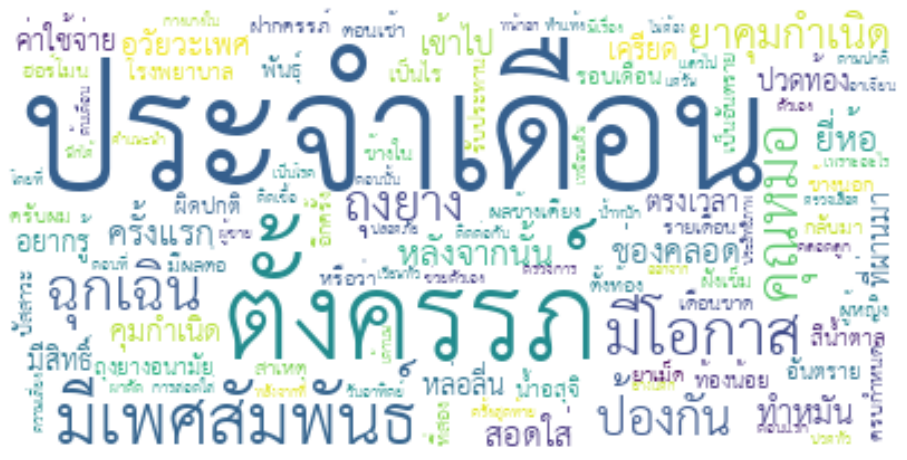

In [670]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_dict = {}
for i in range(0,len(keyword_df2)):
   word_dict[keyword_df2.word[i]]= keyword_df2['count'][i]
wordcloud = WordCloud(font_path='dataset//THSarabunNew.ttf',background_color ='white',max_words=100,collocations=False).fit_words(word_dict)
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()
fig.savefig("wordclod-paper.png")

In [671]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 31.896429777145386 seconds ---


bubble แต่ละอันคือ topic <br>
bubble ที่ใหญ่จะมีความแพร่หลายและโดดเด่นมาก <br>

รูปแบบหัวข้อที่ดีจะเป็นหัวข้อที่ค่อนข้างใหญ่ซึ่งกระจัดกระจายอยู่ในควอดแดรนต์ที่แตกต่างกันแทนที่จะกระจุกอยู่ในจตุภาคเดียว  <br>

- The model with too many topics will have many overlaps, small sized bubbles clustered in one region of chart.
- If you move the cursor the different bubbles you can see different keywords associated with topics.

In [672]:
!pip3 install spacy
!python3 -m spacy download en #Language model
!pip3 install gensim # For topic modeling
!pip install pyLDAvis==2.1.2 # For visualizing topic models


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [673]:
# Run in terminal or command prompt
# python3 -m spacy download en
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [674]:
df = documents.dropna(subset=['headline_text'])

In [675]:
# Convert to list
data = df.headline_text.values.tolist()
# Remove Emails
data = [re.sub(r'\S*@\S*\s?', '', sent) for sent in data]
# Remove new line characters
data = [re.sub(r'\s+', ' ', sent) for sent in data]
# Remove distracting single quotes
data = [re.sub(r"\'", "", sent) for sent in data]
pprint(data[:1])

['ตั้งครรภ์่ท้องแข็งบ่อยมากจะมีอันตรายกับเด็กในครรภ์มั้ยคะตั้งครรภ์สัปดาห์เจ็บหน่วงบริเวณท้องน้อยและอวัยวะเพศต้องทำไงตั้งครรภ์ควรดื่มนมวัวมั้ยคะมีประโยชน์แบะมีผลกระทบการดื่มนมวัวมากไปหรือไม่ต่อเด็กในครรภ์ตั้งครรภ์แล้วรกต่ำสาเหตุเกิดจากอะไรคะตั้งครรภ์เดือนกว่ามีตกขาวมาตลอดจะอันตรายกับลูกในครรภ์ไหมคะตั้งครรภ์สัปดาห์ลูกไม่ดิ้นเป็นอะไรหรือป่าวคะตั้งครรภ์สัปดาห์สามารถออกกำลังกายอะไรได้บ้างคะที่จะให้ลูกในครรภ์และแม่เเข็งแรงตั้งครรภ์สัปดาห์เจอภาวะแท้งคุกคามหรือจริงๆแล้วเปนแค่ปคะจำเดือนล้างหน้าเด็กแบบที่ชาวบ้านเรียกตอนนี้ไหลมาวันแล้วตั้งครรภ์เดือนครึ่งทำไมใหญ่เหมือนเดือนค่ะผิดปกติหรือเปล่าค่ะตั้งครรภ์สัปดาห์แล้วตรวจพบเชื้อหัดเยอรมันกลัวมีผลกับทารกอายุตั้งครรภ์จะเดือนต้องเจาะน้ำคร้ำไมคะตั้งครรภ์เจาะเลือดหาความผิดปกติของโครโมโซมลูกพบมีความเสี่ยงเป็นโรคเทอร์เนอร์ถ้าเจาะน้ำคร่ำผลจะเป็นตามที่เจาะเลือดไหมคะกลัวมากตั้งครรภ์สัปดาห์มีอาการปวดท้องตลอดแต่พอทนไหวเคยไปพบหมอหมอว่ารกเกาะต่ำไม่เป็นอะไรแต่ทำไมยังปวดท้องอยู่เรื่อยๆท้องแข็งบ่อยๆจะเป็นอันตรายตาอลูกไหมค่ะคือตอนนี้ประจำเดือนมาได้เดือนแล้วแต่คุมกำเน

In [676]:
data

['ตั้งครรภ์่ท้องแข็งบ่อยมากจะมีอันตรายกับเด็กในครรภ์มั้ยคะตั้งครรภ์สัปดาห์เจ็บหน่วงบริเวณท้องน้อยและอวัยวะเพศต้องทำไงตั้งครรภ์ควรดื่มนมวัวมั้ยคะมีประโยชน์แบะมีผลกระทบการดื่มนมวัวมากไปหรือไม่ต่อเด็กในครรภ์ตั้งครรภ์แล้วรกต่ำสาเหตุเกิดจากอะไรคะตั้งครรภ์เดือนกว่ามีตกขาวมาตลอดจะอันตรายกับลูกในครรภ์ไหมคะตั้งครรภ์สัปดาห์ลูกไม่ดิ้นเป็นอะไรหรือป่าวคะตั้งครรภ์สัปดาห์สามารถออกกำลังกายอะไรได้บ้างคะที่จะให้ลูกในครรภ์และแม่เเข็งแรงตั้งครรภ์สัปดาห์เจอภาวะแท้งคุกคามหรือจริงๆแล้วเปนแค่ปคะจำเดือนล้างหน้าเด็กแบบที่ชาวบ้านเรียกตอนนี้ไหลมาวันแล้วตั้งครรภ์เดือนครึ่งทำไมใหญ่เหมือนเดือนค่ะผิดปกติหรือเปล่าค่ะตั้งครรภ์สัปดาห์แล้วตรวจพบเชื้อหัดเยอรมันกลัวมีผลกับทารกอายุตั้งครรภ์จะเดือนต้องเจาะน้ำคร้ำไมคะตั้งครรภ์เจาะเลือดหาความผิดปกติของโครโมโซมลูกพบมีความเสี่ยงเป็นโรคเทอร์เนอร์ถ้าเจาะน้ำคร่ำผลจะเป็นตามที่เจาะเลือดไหมคะกลัวมากตั้งครรภ์สัปดาห์มีอาการปวดท้องตลอดแต่พอทนไหวเคยไปพบหมอหมอว่ารกเกาะต่ำไม่เป็นอะไรแต่ทำไมยังปวดท้องอยู่เรื่อยๆท้องแข็งบ่อยๆจะเป็นอันตรายตาอลูกไหมค่ะคือตอนนี้ประจำเดือนมาได้เดือนแล้วแต่คุมกำเน

In [677]:
def cleanText(text):
  text = str(text)
  text = re.sub('[^ก-๙]','',text)
  stop_word = list(thai_stopwords())
  sentence = word_tokenize(text, engine='newmm')
  list_words = ['สวัสดี','ขอบคุณ','อยู่แล้ว' , 'สัปดาห์' ,'หนูก้อรีบ' ,'ชอบเป้น' ,'นิดนึง' ,'ตุลาเลย' , 'เหมือน' , 'สอบถาม', 'อะครับ','คะอยาก','เสี่ยง','ปริมาณ','ต่อเนื่อง','เปื้อน','กางเกง',
                 'สุดท้าย','เรื่อง','รึป่าว','มากน้อย','ชั่วโมง','ประมาณ','บริเวณ','ผู้เชี่ยวชาญ','พยาบาล','ประมาน','นิดเดียว','สม่ำเสมอ','กคประจำ','วี่แวว','เที่ยง','คะแล้ว','ลักษณะ',
                 'อาทิตย์','จันทร์','อังคาร','พุธ','พฤหัส','ศุกร์','เสาร์','คะดิฉัน','สองสาม','รุ้ว่า','ปากช่อง','รึเปล่า','สังเกตุ','ทั้งๆที่','เป็นอยู่','มิถุนา','ได้ยิน','แน่นอน','เครื่อง','ตัดสินใจ','อวัยวะ','สมมุติ','เตรียม','ล่วงหน้า','เรียบร้อย','คับคือ',
                 'เมษายน','ธันวาคม','พฤษภาคม','พฤศจิกายน','มกราคม','กุมภาพันธ์','มีนาคม','มิถุนายน','สิงหาคม','กรกฎาคม','ตุลาคม','กันยายน',
                 'จังหวัด', 'เลื่อน','ปรึกษา', 'เกี่ยว','ต้องการ','รู้สึก','สมบูรณ์','มั่นใจ', 'เนื่อง', 'สำหรับ', 'คะพอดี','รุ้สึก','หาสจาก','ร่างกาย','ห้องน้ำ','วันที่','ตอนนี้','ได้การ']
  result = [word for word in sentence if word not in stop_word and len(word) >5 and " " not in word and word not in list_words]
  # result = [word for word in sentence if word not in stop_word and len(word) >5 and " " not in word]
  return " ".join(result)

def tokenize(d):
  result = d.split(" ")
  result = list(filter(None, result))
  return result

data_words = []
for txt in documents['headline_text']:
  data_words.append(cleanText(txt))

# vectorizer = CountVectorizer(tokenizer=tokenize)
# transformed_data = vectorizer.fit_transform(new_text)
# count_data = zip(vectorizer.get_feature_names(), np.ravel(transformed_data.sum(axis=0)))
# keyword_df2 = pd.DataFrame(columns = ['word', 'count'])
# keyword_df2['word'] = vectorizer.get_feature_names()
# keyword_df2['count'] = np.ravel(transformed_data.sum(axis=0))
# keyword_df2.sort_values(by=['count'], ascending=False).head(10)


In [678]:
data_words

['ตั้งครรภ์ ท้องแข็ง อันตราย ตั้งครรภ์ ท้องน้อย อวัยวะเพศ ตั้งครรภ์ มีประโยชน์ มีผลกระทบ ตั้งครรภ์ สาเหตุ ตั้งครรภ์ อันตราย ตั้งครรภ์ ตั้งครรภ์ ออกกำลังกาย ตั้งครรภ์ คุกคาม ล้างหน้า ชาวบ้าน ตั้งครรภ์ ผิดปกติ ตั้งครรภ์ หัดเยอรมัน ตั้งครรภ์ คร้ำไม ตั้งครรภ์ ความผิดปกติ โครโมโซม ความเสี่ยง เป็นโรค น้ำคร่ำ ตั้งครรภ์ ปวดท้อง ไม่เป็นอะไร ปวดท้อง ท้องแข็ง เป็นอันตราย ประจำเดือน คุมกำเนิด ตั้งครรภ์ เวลานอน เพราะอะไร เป็นโรค ตั้งครรภ์ ผลกระทบ ตั้งครรภ์ หน่ววๆ อวัยวะเพศ อยากรู้ ผู้หญิง ตั้งครรภ์ ใหมคร๊ ตั้งครรภ์ คุมกำเนิด ตั้งครรภ์ ตอนที่ ตั้งครรภ์ สุขภาพ มีผลกระทบ หรือว่า เกิดขึ้น ตั้งครรภ์ เกิดขึ้น ตั้งครรภ์ ขนอ่อน โดยเฉพาะ หน้าท้อง ตั้งครรภ์ เวลานอน นอนตะแคง ตั้งครรภ์ น้ำหนัก น้ำหนัก ผิดปกติ เป็นโรค ตั้งครรภ์ มีสิทธิ์ เป็นโรค ตั้งครรภ์ เวลานอน อยากรู้ เพราะอะไร ตั้งครรภ์ รับประทาน ประเภท แข็งแรง ผู้หญิง ตั้งครรภ์ คุณแม่ ตั้งครรภ์ ยาระบาย ท้องผูก คุณแม่ คาเฟอีน ที่อยู่ ตั้งครรภ์ ตั้งครรภ์ มีผลต่อ ป้องกัน อย่างไรบ้าง ตั้งครรภ์ ถึงกำหนด ถึงกับ สูญเสีย ที่สอง แล้วก็ คลอดลูก เป็นปกติ อันตราย ผู้หญ

In [679]:
vectorizer = TfidfVectorizer(analyzer='word', max_df = 0.5, min_df = 10,stop_words=stopwords, token_pattern='[a-zA-Z0-9]{3,}',  tokenizer=tokenize )
data_vectorized = vectorizer.fit_transform(data_words)

In [680]:
data_vectorized.shape

(8248, 414)

In [681]:
print(data_vectorized)

  (0, 390)	0.007631607094638971
  (0, 307)	0.005870238148806842
  (0, 66)	0.007170631053736787
  (0, 108)	0.008156451901825613
  (0, 401)	0.007136954548685782
  (0, 42)	0.007580695586797702
  (0, 116)	0.007532047575231132
  (0, 251)	0.007356568569577714
  (0, 398)	0.005991350552798341
  (0, 130)	0.007800309607689634
  (0, 232)	0.008244050645801552
  (0, 350)	0.01615069626550178
  (0, 290)	0.0074407947375142395
  (0, 347)	0.019559350680339316
  (0, 228)	0.008339275901886043
  (0, 274)	0.008339275901886043
  (0, 331)	0.008156451901825613
  (0, 43)	0.013408648532999933
  (0, 265)	0.006873026779550629
  (0, 185)	0.006154247216377452
  (0, 10)	0.013278582543297857
  (0, 275)	0.015064095150462264
  (0, 139)	0.013852845476162683
  (0, 286)	0.007999842330146107
  (0, 341)	0.0070725595020071025
  :	:
  (8239, 38)	0.4317287390346159
  (8239, 136)	0.38382923508302763
  (8239, 165)	0.14382897717352416
  (8240, 105)	0.47778911224702436
  (8240, 263)	0.4214860387636241
  (8240, 4)	0.330624319406419


In [682]:
data_vectorized


<8248x414 sparse matrix of type '<class 'numpy.float64'>'
	with 29783 stored elements in Compressed Sparse Row format>

In [683]:
transformed_data = vectorizer.fit_transform(data_words)
count_data = zip(vectorizer.get_feature_names(), np.ravel(transformed_data.sum(axis=0)))
keyword_df2 = pd.DataFrame(columns = ['word', 'count'])
keyword_df2['word'] = vectorizer.get_feature_names()
keyword_df2['count'] = np.ravel(transformed_data.sum(axis=0))
keyword_df2.sort_values(by=['count'], ascending=False).head(10)

,word,count
165,ประจำเดือน,1301.363790
96,ตั้งครรภ์,628.769150
202,มีเพศสัมพันธ์,609.404584
204,มีโอกาส,473.475271
63,ฉุกเฉิน,400.540147
54,คุณหมอ,357.715422
114,ถุงยาง,285.641594
174,ป้องกัน,275.134170
391,แบบนี้,274.843354
209,ยาคุมกำเนิด,212.050317


In [684]:
keyword_df2.shape


(414, 2)

In [685]:
keyword_df2.sum()

word     กระดาษกระเด็นกลับด้านกลับบ้านกลับมากลางคืนกลาง...
count                                              13652.4
dtype: object

In [686]:
matrix = vectorizer.fit_transform(data_words)

words_df = pd.DataFrame(matrix.toarray(),
                        columns=vectorizer.get_feature_names())
words_df.head()

,กระดาษ,กระเด็น,กลับด้าน,กลับบ้าน,กลับมา,กลางคืน,กลางเดือน,กะปริบกะปรอย,กังวลใจ,กางเกงใน,การคุมกำเนิด,การตรวจเลือด,การป้องกัน,การยุติ,การรักษา,การสอดใส่,การเจาะ,กำเนิด,กินข้าว,กินหลัง,กินเวลา,ก่อนกำหนด,ก่อนที่,ก่อนที่จะ,ขอบพระคุณ,ขออนุญาต,ขึ้นไป,ข้อมูล,ข้างนอก,ข้างเดียว,ข้างใน,คนอื่น,คนเดียว,ครบกำหนด,ครอบครัว,ครับผม,ครั้งสุดท้าย,ครั้งแรก,คลอดลูก,คลาดเคลื่อน,...,เหนียว,เหนื่อย,เหมือนกัน,เหมือนเดิม,เหลือง,เหลืออยู่,เเต่เเฟน,เเฟนผม,เเฟนเเต่,เเฟนเเบบ,เเฟนเเล้ว,เเล้วผม,เเล้วเเต่,แข็งแรง,แต่งงาน,แต่วัน,แท้งลูก,แบบนี้,แพ้ท้อง,แล้วก็,แล้วจึง,แล้วด้วย,แล้วไป,โดยตรง,โดยที่,โดยปกติ,โรคประจำตัว,โรงบาล,โรงพยาบาล,ใจเต้น,ใช้เวลา,ใช้ได้,ใต้สะดือ,ในกรณีที่,ในกรณีนี้,ให้ทาน,ไทรอยด์,ไปเที่ยว,ไมเกรน,ไม่ต้อง
0,0.0,0.0,0.0,0.007532,0.005771,0.014634,0.0,0.008244,0.007441,0.006141,0.013279,0.0,0.014023,0.0,0.021512,0.0,0.008339,0.007929,0.007532,0.0,0.0,0.071043,0.0,0.014023,0.0,0.0,0.056527,0.006983,0.000000,0.065952,0.0,0.0,0.0,0.018545,0.0,0.005595,0.0,0.014208,0.070162,0.0,...,0.0,0.013965,0.007012,0.026004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095998,0.02793,0.0,0.007632,0.067765,0.023223,0.031381,0.0,0.0,0.006089,0.008244,0.005991,0.0,0.0078,0.007137,0.016666,0.0,0.0,0.0,0.008156,0.014634,0.0,0.0,0.037903,0.0,0.214089,0.019982
1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.707696,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.610074,0.000000,0.0,0.0,0.0,0.000000,0.0,0.298641,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000


In [687]:
len(vectorizer.get_feature_names())

414

In [688]:
from sklearn.decomposition import LatentDirichletAllocation

# Use LDA to look for 15 topics
n_topics = 4
model = LatentDirichletAllocation(n_components=n_topics)
model.fit(matrix)

# Print the top 10 words per topic
n_words = 4
feature_names = vectorizer.get_feature_names()

topic_list = []
for topic_idx, topic in enumerate(model.components_):
    top_n = [feature_names[i]
             for i in topic.argsort()
             [-n_words:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(f"topic_{'_'.join(top_n[:3])}") 

    print(f"Topic {topic_idx}: {top_features}")

Topic 0: ตั้งครรภ์ แบบนี้ อันตราย เข้าไป
Topic 1: ประจำเดือน สอดใส่ ถุงยาง ช่องคลอด
Topic 2: ตั้งครรภ์ คุณหมอ ทำหมัน คุมกำเนิด
Topic 3: ประจำเดือน มีเพศสัมพันธ์ มีโอกาส ฉุกเฉิน


In [689]:
# Convert our counts into numbers
amounts = model.transform(matrix) * 100

# Set it up as a dataframe
topics = pd.DataFrame(amounts, columns=topic_list)
topics.head(2)

,topic_ตั้งครรภ์_แบบนี้_อันตราย,topic_ประจำเดือน_สอดใส่_ถุงยาง,topic_ตั้งครรภ์_คุณหมอ_ทำหมัน,topic_ประจำเดือน_มีเพศสัมพันธ์_มีโอกาส
0,32.529358,21.342312,37.615201,8.513129
1,30.625886,8.929587,8.886020,51.558508


In [690]:

# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=4, max_iter=10,learning_method='online', random_state=100,  batch_size=128, n_jobs = -1,  learning_offset=50.)    # Number of topics
                                                    
# Max learning iterations                                                                              
# Random state                                            
# n docs in each learning iter                                      
# compute perplexity every n iters, default: Don't                                       
# Use all available CPUs
                                     

lda_output = lda_model.fit_transform(data_vectorized)
print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=4, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [691]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))
# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -76619.7152420327
Perplexity:  273.74209833827797
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 50.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 4,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [692]:
lda_output.shape

(8248, 4)

In [693]:
print(lda_model)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=4, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [694]:
# Init the Model
lda_model = LatentDirichletAllocation(max_iter=10, learning_method='online', learning_offset=50.,random_state=None)
# Init Grid Search Class

In [695]:
# Define Search Param
search_params = {'n_components': [9], 'learning_decay': [.5, .7, .9]}
# Init the Model
# lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=10)
# Init Grid Search Class
model = GridSearchCV(lda_model, param_grid=search_params)
# Do the Grid Search
model.fit(data_vectorized)
GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=50., max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=-1, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),
       iid=True, n_jobs=1,
       param_grid={'n_topics': [10,20,30,40,50,60], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

GridSearchCV(cv=None, error_score='raise',
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method=None,
                                                 learning_offset=50.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=-1,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 total

In [696]:
# Best Model
best_lda_model = model.best_estimator_
# Model Parameters
print("Best Model's Params: ", model.best_params_)
# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)
# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 9}
Best Log Likelihood Score:  -18608.393303028133
Model Perplexity:  447.55967344969605


In [697]:
results = pd.DataFrame(model.cv_results_)

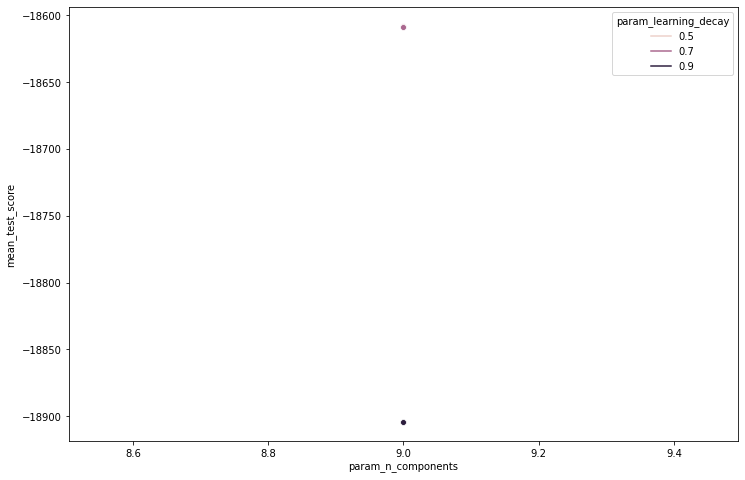

In [698]:
import seaborn as sns
plt.figure(figsize=(12,8))

sns.lineplot(data=results,
             x='param_n_components',
             y='mean_test_score',
             hue='param_learning_decay',
             # https://github.com/mwaskom/seaborn/issues/1515
            
             marker='o'
            )

# # Would need a good way to show three error bars
# plt.errorbar(x=results['param_n_components'],
#              y=results.mean_test_score,
#              yerr=results.std_test_score,
#              fmt='none',
#              color=current_palette[0])

plt.show()

In [699]:
print(data_vectorized)

  (0, 390)	0.007631607094638971
  (0, 307)	0.005870238148806842
  (0, 66)	0.007170631053736787
  (0, 108)	0.008156451901825613
  (0, 401)	0.007136954548685782
  (0, 42)	0.007580695586797702
  (0, 116)	0.007532047575231132
  (0, 251)	0.007356568569577714
  (0, 398)	0.005991350552798341
  (0, 130)	0.007800309607689634
  (0, 232)	0.008244050645801552
  (0, 350)	0.01615069626550178
  (0, 290)	0.0074407947375142395
  (0, 347)	0.019559350680339316
  (0, 228)	0.008339275901886043
  (0, 274)	0.008339275901886043
  (0, 331)	0.008156451901825613
  (0, 43)	0.013408648532999933
  (0, 265)	0.006873026779550629
  (0, 185)	0.006154247216377452
  (0, 10)	0.013278582543297857
  (0, 275)	0.015064095150462264
  (0, 139)	0.013852845476162683
  (0, 286)	0.007999842330146107
  (0, 341)	0.0070725595020071025
  :	:
  (8239, 38)	0.4317287390346159
  (8239, 136)	0.38382923508302763
  (8239, 165)	0.14382897717352416
  (8240, 105)	0.47778911224702436
  (8240, 263)	0.4214860387636241
  (8240, 4)	0.330624319406419


In [700]:
data_vectorized

<8248x414 sparse matrix of type '<class 'numpy.float64'>'
	with 29783 stored elements in Compressed Sparse Row format>

In [701]:
# Create Document — Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)
# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]
# index names
docnames = ["Doc" + str(i) for i in range(len(data))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
# Styling
def color_green(val):
 color = 'green' if val > .1 else 'lack'
 return 'color: {col}'.format(col=color)
def make_bold(val):
 weight = 700 if val > .1 else 400
 return 'font-weight: {weight}'.format(weight=weight)
# Apply Style
df_document_topics = df_document_topic.head(50).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,dominant_topic
Doc0,0.060000,0.080000,0.100000,0.050000,0.080000,0.170000,0.040000,0.330000,0.080000,7
Doc1,0.040000,0.280000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.450000,8
Doc2,0.320000,0.030000,0.030000,0.030000,0.030000,0.110000,0.030000,0.030000,0.390000,8
Doc3,0.060000,0.060000,0.060000,0.060000,0.060000,0.060000,0.560000,0.060000,0.060000,6
Doc4,0.270000,0.480000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,1
Doc5,0.050000,0.050000,0.050000,0.050000,0.630000,0.050000,0.050000,0.050000,0.050000,4
Doc6,0.170000,0.030000,0.470000,0.030000,0.030000,0.030000,0.030000,0.180000,0.030000,2
Doc7,0.060000,0.060000,0.060000,0.060000,0.060000,0.560000,0.060000,0.060000,0.060000,5
Doc8,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.630000,8
Doc9,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.620000,8


In [702]:
df_document_topics.to_excel('styled.xlsx', engine='openpyxl')

In [703]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)
# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames
# View
df_topic_keywords.head()
df_topic_keywords.to_csv("vector_text_LDA.csv")

In [704]:
df_topic_keywords

,กระดาษ,กระเด็น,กลับด้าน,กลับบ้าน,กลับมา,กลางคืน,กลางเดือน,กะปริบกะปรอย,กังวลใจ,กางเกงใน,การคุมกำเนิด,การตรวจเลือด,การป้องกัน,การยุติ,การรักษา,การสอดใส่,การเจาะ,กำเนิด,กินข้าว,กินหลัง,กินเวลา,ก่อนกำหนด,ก่อนที่,ก่อนที่จะ,ขอบพระคุณ,ขออนุญาต,ขึ้นไป,ข้อมูล,ข้างนอก,ข้างเดียว,ข้างใน,คนอื่น,คนเดียว,ครบกำหนด,ครอบครัว,ครับผม,ครั้งสุดท้าย,ครั้งแรก,คลอดลูก,คลาดเคลื่อน,...,เหนียว,เหนื่อย,เหมือนกัน,เหมือนเดิม,เหลือง,เหลืออยู่,เเต่เเฟน,เเฟนผม,เเฟนเเต่,เเฟนเเบบ,เเฟนเเล้ว,เเล้วผม,เเล้วเเต่,แข็งแรง,แต่งงาน,แต่วัน,แท้งลูก,แบบนี้,แพ้ท้อง,แล้วก็,แล้วจึง,แล้วด้วย,แล้วไป,โดยตรง,โดยที่,โดยปกติ,โรคประจำตัว,โรงบาล,โรงพยาบาล,ใจเต้น,ใช้เวลา,ใช้ได้,ใต้สะดือ,ในกรณีที่,ในกรณีนี้,ให้ทาน,ไทรอยด์,ไปเที่ยว,ไมเกรน,ไม่ต้อง
Topic0,4.855282,4.417222,0.111181,0.111128,0.111162,0.111119,0.111112,0.111111,0.111120,0.111202,0.111120,0.111188,0.111155,0.111119,0.111115,0.111353,0.111123,0.111112,0.111124,0.111146,16.199680,0.111161,0.111183,0.111146,0.111135,16.461667,0.111122,14.489051,0.111290,0.111144,0.111202,0.111222,0.111116,0.111115,0.111122,56.222035,0.111113,0.111151,0.111129,0.111148,...,0.111140,0.111142,0.111172,0.111138,0.111117,0.111123,8.227959,16.277124,0.111174,4.906177,0.111162,0.111252,0.111119,0.111125,0.111116,0.111117,0.111113,35.903174,0.111133,18.032973,8.693873,0.111127,0.111164,6.226395,0.111186,0.111123,0.111111,0.111116,0.111118,9.433973,0.111153,6.241058,0.111128,0.111175,0.111217,0.111114,0.111113,0.111164,0.111115,0.111125
Topic1,0.111112,0.111119,0.111113,0.111126,56.163326,0.111121,0.111122,0.111277,0.111127,0.111129,0.111138,0.111133,0.111119,0.111129,0.111154,0.111129,0.111111,0.111117,0.111138,0.111117,0.111121,0.111130,14.920515,0.111130,0.111120,0.111136,0.111125,0.111160,0.111139,5.025258,0.111145,6.767316,7.355005,0.111126,0.111139,0.111142,0.111152,0.111129,0.111142,0.111144,...,0.111136,0.111123,0.111146,0.111131,0.111116,0.111121,0.111113,0.111129,0.111113,0.111128,0.111124,8.238083,0.111112,0.111128,0.111115,0.111136,0.111124,0.111162,0.111130,15.763020,0.111130,0.111121,0.111121,0.111122,41.211978,0.111165,0.111123,0.111122,79.157600,0.111117,6.860036,0.111132,4.356677,0.111139,0.111133,0.111145,0.111120,9.418386,0.111172,28.567312
Topic2,0.111119,0.111113,0.111116,0.111114,0.111164,0.111115,0.111115,0.111130,0.111128,0.111128,22.795145,0.111114,0.111133,0.111116,0.111120,0.111122,5.391705,0.111124,0.111114,10.156541,0.111166,0.111140,0.111137,0.111128,0.111130,0.111135,0.111127,0.111163,0.111124,0.111138,0.111128,0.111122,0.111113,0.111133,0.111119,0.111127,0.111123,0.111145,0.111128,0.111166,...,0.111158,0.111125,17.779771,22.210511,0.111112,0.111138,0.111111,0.111127,0.111113,0.111123,0.111111,0.111123,7.901292,0.111123,0.111131,0.111133,0.111116,0.111185,0.111112,12.947336,0.111121,0.111125,0.111136,0.111113,0.111142,0.111152,0.111117,0.111117,0.111118,0.111117,0.111149,0.111120,0.111112,0.111170,0.111149,18.741501,0.111119,0.111117,0.111187,0.111138
Topic3,0.111118,0.111165,0.111113,0.111117,0.111126,0.111135,0.111115,0.111146,0.111119,0.111125,0.111113,4.500737,0.111130,25.639462,0.111122,0.111134,0.111111,9.232272,0.111115,0.111133,0.111142,0.111135,0.111125,0.111253,0.111126,0.111127,0.111141,0.111123,0.111137,0.111131,0.111126,0.111126,0.111113,0.111128,0.111137,0.111130,0.111124,0.111142,0.111153,0.111169,...,0.111119,0.111119,0.111156,0.111138,0.111119,0.111127,0.111204,0.111115,7.675829,0.111117,0.111124,0.111125,0.111135,0.111121,0.111112,0.111132,12.187865,0.111156,0.111135,0.111153,0.111111,0.111113,0.111137,0.111112,0.111140,0.111130,0.111111,0.111151,0.111167,0.111122,0.111114,0.111119,0.111116,0.111127,0.111123,0.111122,0.111118,0.111136,0.111123,0.111118
Topic4,0.111119,0.111115,0.111111,8.570730,0.111135,0.111114,0.111120,0.111146,0.111113,40.048965,0.111114,0.111155,0.111132,0.111135,0.111173,0.111150,0.111143,0.111120,0.111117,0.111111,0.111121,0.111130,0.111138,0.111126,0.111119,0.111117,0.111143,0.111144,0.111145,0.111113,0.111130,0.111124,0.111167,0.111122,0.111137,0.111123,0.111137,0.111123,0.111177

In [705]:
df_topic_VECTOR = df_topic_keywords 

In [706]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in best_lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,ถุงยาง,อวัยวะเพศ,สอดใส่,เข้าไป,ช่องคลอด,พันธุ์,มีโอกาส,หล่อลื่น,ประจำเดือน,ครับผม,มีเพศสัมพันธ์,ฉุกเฉิน,อาเจียน,ผู้หญิง,แบบนี้
Topic 1,เครียด,โรงพยาบาล,รอบเดือน,ปวดท้อง,ที่ผ่านมา,ประจำเดือน,กลับมา,ผลข้างเคียง,หรือว่า,เดือนขาด,ตัวเอง,โดยที่,ตั้งครรภ์,ไม่ต้อง,หลังจากที่
Topic 2,ยาคุมกำเนิด,ยี่ห้อ,ประจำเดือน,คุมกำเนิด,ฮอร์โมน,มีผลต่อ,สาเหตุ,เต้านม,คุณหมอ,ตามปกติ,มีเพศสัมพันธ์,ตั้งครรภ์,ประสิทธิภาพ,คำแนะนำ,ติดเชื้อ
Topic 3,ฉุกเฉิน,ถุงยางอนามัย,ท้องน้อย,ตั้งท้อง,อีกครั้ง,มีเพศสัมพันธ์,เสียค่าใช้จ่าย,ตั้งครรภ์,นึกได้,ธรรมดา,ออกจาก,การยุติ,มีโอกาส,ฝากท้อง,คุณหมอ
Topic 4,ทำหมัน,ค่าใช้จ่าย,ฝากครรภ์,แล้วไป,ตั้งครรภ์,เป็นอันตราย,กางเกงใน,ตอนที่,แต่วัน,คุณหมอ,ต่างจังหวัด,สิ้นเดือน,ประจำเดือน,แต่งงาน,เป็นไปได้
Topic 5,ตั้งครรภ์,เป็นไร,ที่สอง,ตอนเช้า,ปัสสาวะ,ตอนแรก,ประจำเดือน,วันอาทิตย์,ตรวจการ,ตอนนั้น,ตรวจเลือด,การสอดใส่,ปวดหัว,ตอนกลางคืน,ปลอดภัย
Topic 6,ประจำเดือน,มีเพศสัมพันธ์,มีโอกาส,ป้องกัน,ฉุกเฉิน,มีสิทธิ์,ตรงเวลา,ถุงยาง,ตั้งครรภ์,คุณหมอ,ข้างใน,ข้างนอก,คลอดลูก,แบบนี้,ครั้งสุดท้าย
Topic 7,ประจำเดือน,แบบนี้,คุณหมอ,ตั้งครรภ์,อยากรู้,สีน้ำตาล,ผิดปกติ,ยาเม็ด,รับประทาน,เป็นโรค,ความเสี่ยง,น้ำหนัก,มีเรื่อง,ติดต่อกัน,หน้าอก
Topic 8,ครั้งแรก,ประจำเดือน,มีเพศสัมพันธ์,น้ำอสุจิ,ฝังเข็ม,ฉุกเฉิน,ครบกำหนด,หลังจากนั้น,อันตราย,มีโอกาส,ช่วยตัวเอง,แล้วก็,รายเดือน,ผ่าตัด,ถุงยาง


In [707]:
# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=4, random_state=100).fit_predict(lda_output)
# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)
# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]
# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))
# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))

Component's weights: 
 [[ 0.34  0.27  0.28  0.23  0.23  0.29  0.59  0.33  0.29]
 [-0.35 -0.13 -0.18 -0.11 -0.11 -0.17  0.8  -0.3  -0.22]]
Perc of Variance Explained: 
 [0.02 0.23]


In [708]:
lda_output

array([[0.06169225, 0.08458549, 0.0989956 , ..., 0.04307964, 0.32903449,
        0.08464048],
       [0.0394457 , 0.2774103 , 0.03945141, ..., 0.03949918, 0.03944917,
        0.4464195 ],
       [0.3233822 , 0.02915752, 0.02915889, ..., 0.02923413, 0.02915816,
        0.39238878],
       ...,
       [0.05556273, 0.05556639, 0.05557402, ..., 0.55547417, 0.05557698,
        0.055568  ],
       [0.04177517, 0.04177839, 0.04177734, ..., 0.0417773 , 0.04178059,
        0.04177655],
       [0.04603321, 0.3466523 , 0.04603321, ..., 0.04603321, 0.04603321,
        0.04603321]])

In [709]:
# from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler()
# mms.fit(lda_output)
# data_transformed = mms.transform(lda_output)
# def plot_clustering(data, labels, title=None):
#     x_min, x_max = np.min(data, axis=0), np.max(data, axis=0)
#     data = (data - x_min) / (x_max - x_min)
#     fig = plt.figure(1, figsize=(4, 3))
#     plt.figure(figsize=(6, 4))
#     plt.scatter(data[:, 0], data[:, 1],
#                  c=labels.astype(np.float))
#     plt.xticks([])
#     plt.yticks([])
#     if title is not None:
#         plt.title(title, size=17)
#     plt.axis('off')

In [710]:
# Sum_of_squared_distances = []
# K = range(1,100)
# for k in K:
#     km = KMeans(n_clusters=k)
#     km = km.fit(data_transformed)
#     Sum_of_squared_distances.append(km.inertia_)
# plt.figure(figsize=(15, 10), dpi=80)
# plt.plot(K, Sum_of_squared_distances, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()

In [711]:
# from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler()
# mms.fit(lda_output)
# data_transformed = mms.transform(lda_output)
# def plot_clustering(data, labels, title=None):
#     x_min, x_max = np.min(data, axis=0), np.max(data, axis=0)
#     data = (data - x_min) / (x_max - x_min)
#     fig = plt.figure(1, figsize=(4, 3))
#     plt.figure(figsize=(6, 4))
#     plt.scatter(data[:, 0], data[:, 1],
#                  c=labels.astype(np.float))
#     plt.xticks([])
#     plt.yticks([])
#     if title is not None:
#         plt.title(title, size=17)
#     plt.axis('off')

Para n_clusters = 2 O score_silhouette médio é : 0.23549822153396285
Para n_clusters = 3 O score_silhouette médio é : 0.26477643639105625
Para n_clusters = 4 O score_silhouette médio é : 0.3121396980862996
Para n_clusters = 5 O score_silhouette médio é : 0.3486582114905872
Para n_clusters = 6 O score_silhouette médio é : 0.3737999078655169
Para n_clusters = 7 O score_silhouette médio é : 0.40359602824074303
Para n_clusters = 8 O score_silhouette médio é : 0.42415658760039976
Para n_clusters = 9 O score_silhouette médio é : 0.4423978651819814
Para n_clusters = 10 O score_silhouette médio é : 0.44255395478113196


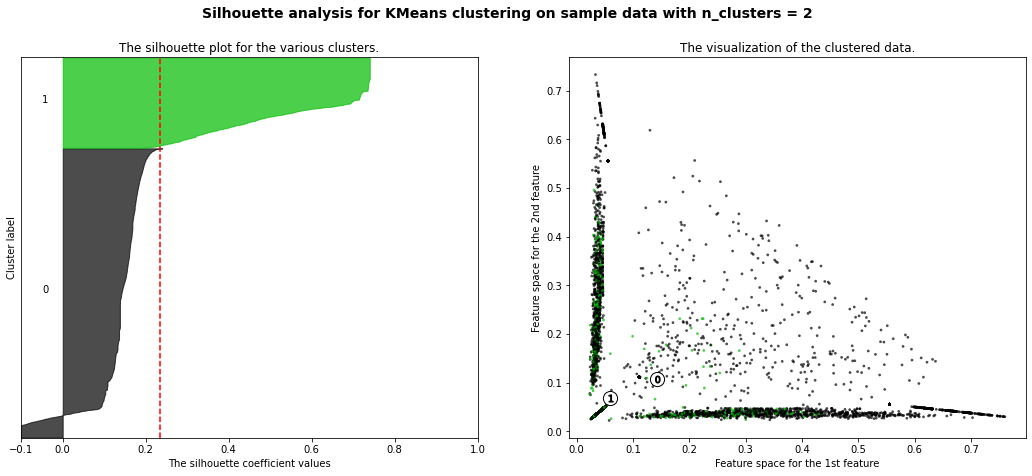

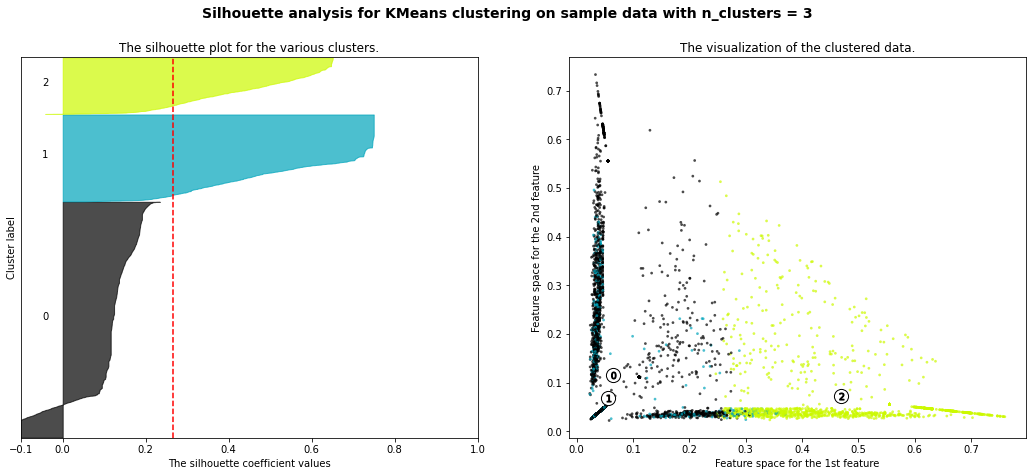

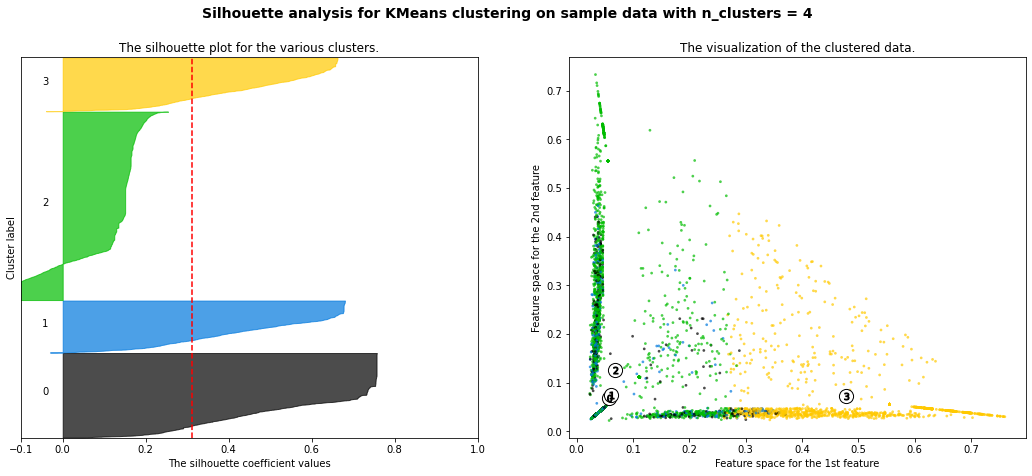

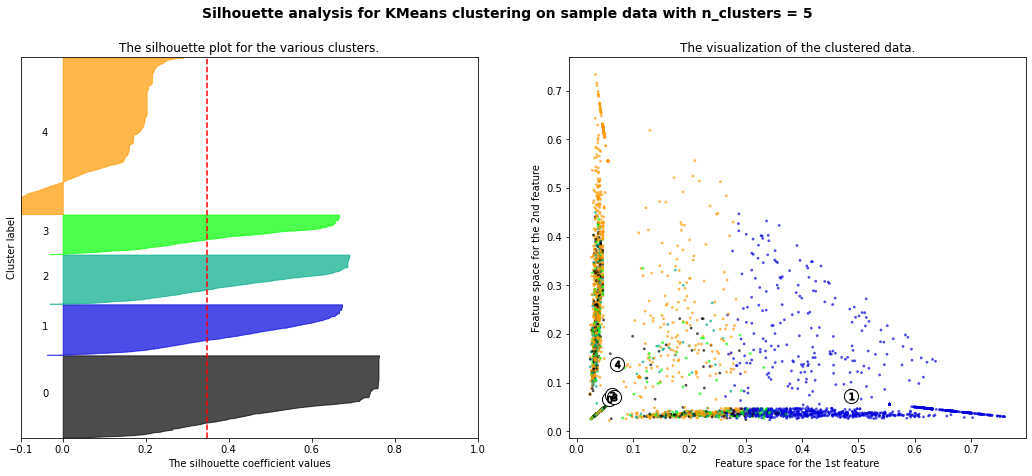

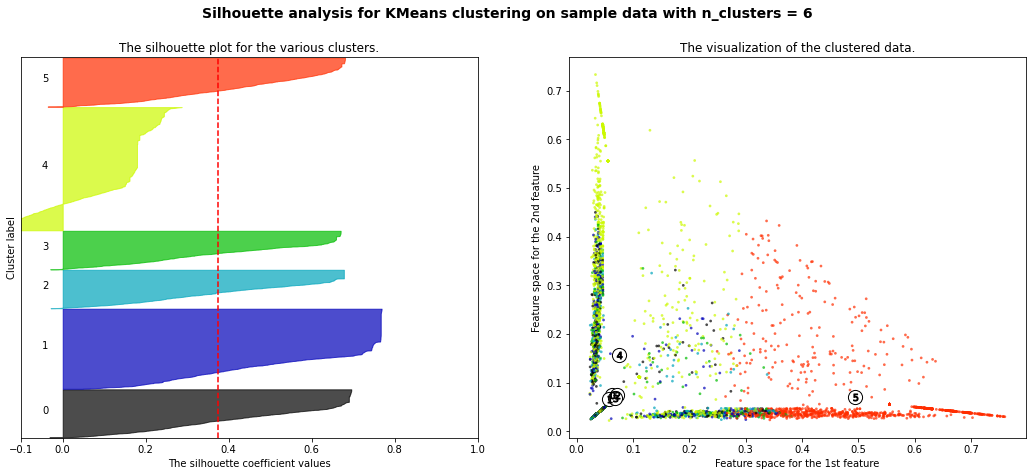

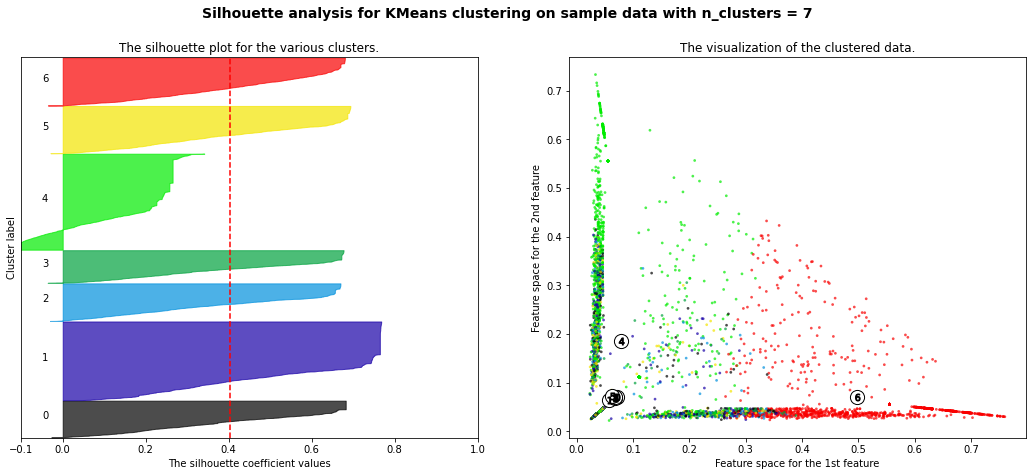

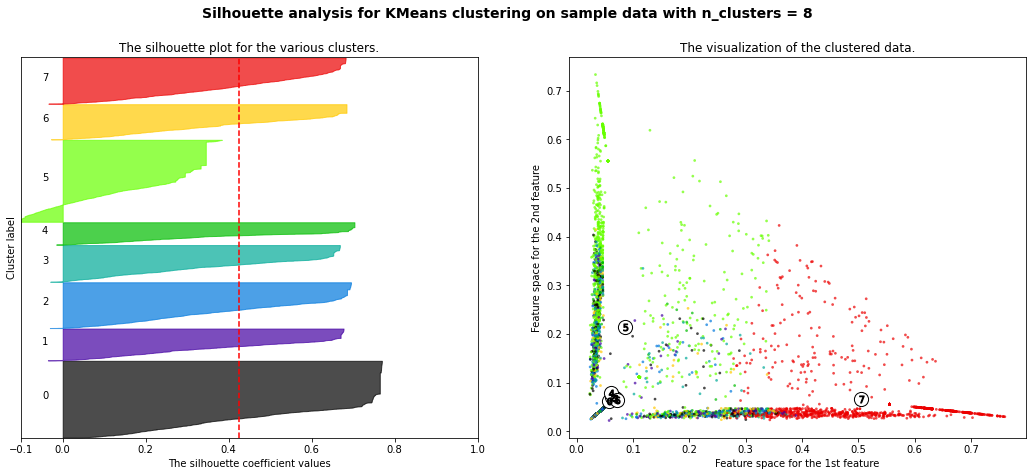

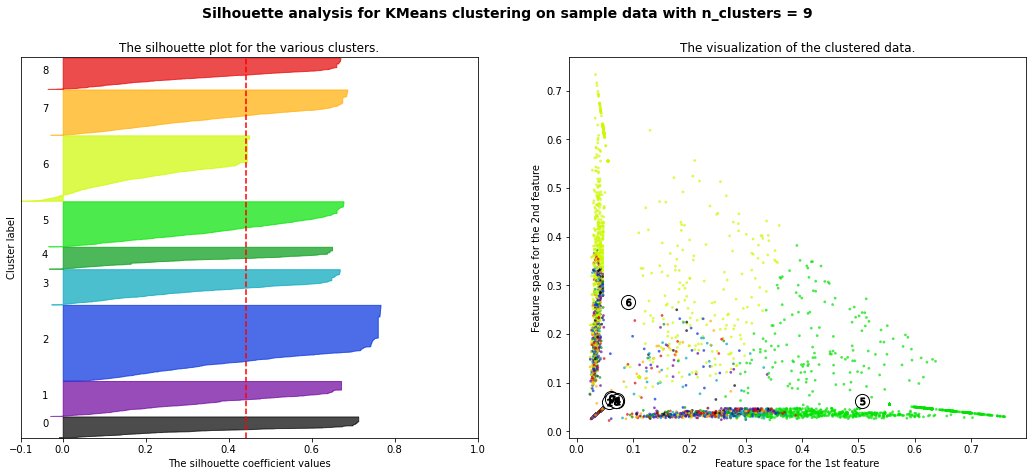

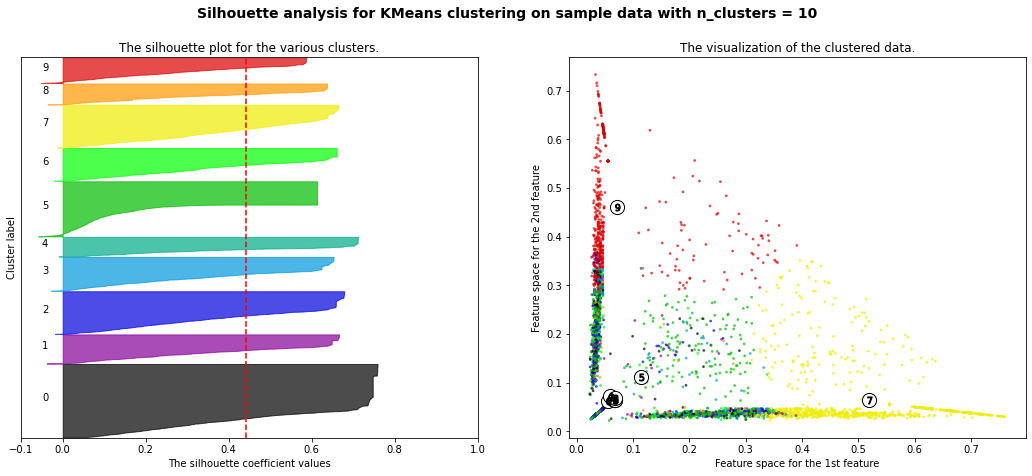

<Figure size 432x288 with 0 Axes>

In [712]:
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm
range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(lda_output) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(lda_output)
# The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(lda_output, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "O score_silhouette médio é :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(lda_output, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color,       alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(lda_output[:, 0], lda_output[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
  
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
plt.show()
plt.savefig("pyLDSvis-paper.png")

===================================================================================================================================================================

In [713]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 245.9932997226715 seconds ---


In [714]:
from pandas import DataFrame
data = DataFrame(data_words,columns=['text'])
print (data)

                                                   text
0     ตั้งครรภ์ ท้องแข็ง อันตราย ตั้งครรภ์ ท้องน้อย ...
1          มีเพศสัมพันธ์ การป้องกัน เดือนขาด ประจำเดือน
2     ช่วยตัวเอง น้ำอสุจิ ผู้หญิง เป็นไร ข้างนอก ครั...
3                                      ทำแท้ง ผิดกฎหมาย
4     คุณหมอ มาโดยตลอด ประจำเดือน คุณหมอ หรือว่า รอบ...
...                                                 ...
8243  เข้าเดือน มีเพศสัมพันธ์ ป้องกัน มีเพศสัมพันธ์ ...
8244                            ครั้งสุดท้าย ประจำเดือน
8245                                         ประจำเดือน
8246       ฝากครรภ์ รังสิต ตั้งครรภ์ ตอบสนอง ค่าใช้จ่าย
8247                  ทำหมัน โรงพยาบาล ชลบุรี สิทธิบัตร

[8248 rows x 1 columns]


In [715]:
print(best_lda_model)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.5,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=9, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)


In [716]:

best_lda_model.fit(data_vectorized)
first_topic = best_lda_model.components_[0]

In [717]:
top_topic_words = first_topic.argsort()[-10:]

In [718]:
for i in top_topic_words:
    print(vectorizer.get_feature_names()[i])

หน้าอก
มีผลต่อ
ผ่าตัด
ตัวเอง
ฝากครรภ์
อันตราย
โรงพยาบาล
ค่าใช้จ่าย
คุณหมอ
ตั้งครรภ์


In [719]:
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])

print_topics(best_lda_model, vectorizer)

Topic 0:
[('ตั้งครรภ์', 340.66274988657574), ('คุณหมอ', 99.75542205293952), ('ค่าใช้จ่าย', 92.29670013397974), ('โรงพยาบาล', 79.15771139014876), ('อันตราย', 69.29574768637103), ('ฝากครรภ์', 65.84274357013794), ('ตัวเอง', 43.0922750506039), ('ผ่าตัด', 41.14371994363613), ('มีผลต่อ', 35.67305255844602), ('หน้าอก', 33.67562924723459)]
Topic 1:
[('แบบนี้', 109.67981221135952), ('ตั้งครรภ์', 84.29484672239533), ('ปวดท้อง', 77.20640385208699), ('ประจำเดือน', 60.35343849372877), ('ข้างใน', 58.597143138477705), ('เป็นอันตราย', 47.979747336041925), ('ครั้งสุดท้าย', 44.60292729032935), ('ความเสี่ยง', 38.24442136665721), ('ตรวจการ', 35.462090836114974), ('คุณหมอ', 27.22895749624085)]
Topic 2:
[('อยากรู้', 90.24664909248884), ('พันธุ์', 89.09554711521689), ('รอบเดือน', 77.45299277749743), ('ประจำเดือน', 65.20387631740165), ('กลับมา', 56.163367638813824), ('เป็นโรค', 47.56023405898624), ('สาเหตุ', 43.62156700983721), ('อาเจียน', 42.816927328293566), ('ตั้งครรภ์', 30.465784243668065), ('ผู้ชาย', 29.

In [720]:
topic_values = best_lda_model.transform(data_vectorized)
topic_values.shape

(8248, 9)

In [721]:
documents['Topic'] = topic_values.argmax(axis=1)

In [722]:
documents.head(50)

,user,headline_text,Topic
0,\nHonestDocs User \n,ตั้งครรภ์่ท้องแข็งบ่อยมากจะมีอันตรายกับเด็กในค...,0
1,\nHonestDocs User 1000031\n,รบกวนสอบถามหน่อยค่ะมีเพศสัมพันธ์ประมาณวันที่แล...,5
2,\nHonestDocs User 1000061\n,ถ้าผมช่วยตัวเองเสร็จก่อนหน้าแล้วผมใช้ผ้าเช็ดน้...,6
3,\nHonestDocs User 1000074\n,ถ้ายังไม่พร้อมมีลูกทำแท้งผิดกฎหมายไหมครับปลอาย...,8
4,\nHonestDocs User 1000159\n,สวัสดีค่ะคุณหมอพอดีว่าปกติเป็นคนทานยาคุมพรีมเม...,2
5,\nHonestDocs User 1000231\n,ท้องเดือนแล้วเป็นต่อมบาร์โธลินอักเสบจะเป็นอันต...,1
6,\nHonestDocs User 1000378\n,สวัสดีครับพอดีแฟนผมได้ทานยาคุมของบีลาร่าแบบเม็...,6
7,\nHonestDocs User 1000380\n,แฟนเราตรวจพบว่าเป็นไฮเปอร์ไทรอยด์ต้องทานยาปีจะ...,8
8,\nHonestDocs User 1000406\n,สอบถามราคาในการขูดมดลูกในกรณีที่ตัวอ่อนหยุดการ...,1
9,\nHonestDocs User 1000430\n,พอดีลืมฉีดยาคุมค้ะแบบเดือนค้ะแล้วครบกำหนดวันที...,8


In [723]:
documents.to_csv("topic_to_text4.csv")

In [724]:
documents.groupby(['Topic']).agg(['count'])

,user,headline_text
,count,count
Topic,,
0,1403,1403
1,567,567
2,622,622
3,1099,1099
4,327,327
5,1442,1442
6,1353,1353
7,1082,1082


In [725]:

topic_list = []
for topic_idx, topic in enumerate(best_lda_model.components_):
    top_n = [feature_names[i]
             for i in topic.argsort()
             [-n_words:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(f"topic_{'_'.join(top_n[:6])}") 

    print(f"Topic {topic_idx}: {top_features}")

Topic 0: ตั้งครรภ์ คุณหมอ ค่าใช้จ่าย โรงพยาบาล
Topic 1: แบบนี้ ตั้งครรภ์ ปวดท้อง ประจำเดือน
Topic 2: อยากรู้ พันธุ์ รอบเดือน ประจำเดือน
Topic 3: ยาคุมกำเนิด ประจำเดือน ยี่ห้อ มีสิทธิ์
Topic 4: เป็นไร ที่สอง ผิดปกติ หรือว่า
Topic 5: มีเพศสัมพันธ์ ประจำเดือน ฉุกเฉิน มีโอกาส
Topic 6: ถุงยาง เข้าไป ช่องคลอด สอดใส่
Topic 7: ประจำเดือน ทำหมัน ครั้งแรก แล้วก็
Topic 8: สีน้ำตาล ครบกำหนด แล้วไป รายเดือน


In [726]:
data = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer)
pyLDAvis.display(data)
